In [ ]:
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Extraccion de df desde google drivee.
file_id = "16ypxCIBr9wSGVEaXqWdZUfz9w4xzccwo"
download_link = f"https://drive.google.com/uc?id={file_id}"
response = requests.get(download_link)
csv_data = StringIO(response.text)
# transformamos en df
df = pd.read_csv(csv_data, encoding='utf-8')

In [ ]:
df.shape

(2666, 20)

In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
# Transformamos de bool a int
df['Churn'] = df['Churn'].astype(int)

In [ ]:
#Transformamos las variables categoricas a int
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [ ]:
# Creamos df01, donde Eliminamos variable categorica "State"
df = df.drop('State', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   Area code               2666 non-null   int64  
 2   International plan      2666 non-null   int64  
 3   Voice mail plan         2666 non-null   int64  
 4   Number vmail messages   2666 non-null   int64  
 5   Total day minutes       2666 non-null   float64
 6   Total day calls         2666 non-null   int64  
 7   Total day charge        2666 non-null   float64
 8   Total eve minutes       2666 non-null   float64
 9   Total eve calls         2666 non-null   int64  
 10  Total eve charge        2666 non-null   float64
 11  Total night minutes     2666 non-null   float64
 12  Total night calls       2666 non-null   int64  
 13  Total night charge      2666 non-null   float64
 14  Total intl minutes      2666 non-null   

In [ ]:
fig = px.box(df)
fig.update_layout(template='plotly_dark',height=1200)
fig.show()

In [ ]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
df.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

In [ ]:
# Esa eliminacion corresponde a los valors que se encuentren en las colas de la distribucion , osea antes del  0,05   y valores que estan por delante del 0,95
def eliminar_filas_con_outliers(dataframe, columns):
    df_copy = dataframe.copy()  # Para no modificar el DataFrame original
    for column in columns:
        q1 = df_copy[column].quantile(0.25)
        q3 = df_copy[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]
    return df_copy

In [ ]:
df=eliminar_filas_con_outliers(df,['Account length', 'Area code',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls'])

In [ ]:
# Corroboramos la eliminacion de los outliers graficamente
fig = px.box(df)
fig.update_layout(template='plotly_dark',height=1200)
fig.show()

In [ ]:
def normalizar_variables(dataframe, columns):
    df_copy = dataframe.copy()  # Para no modificar el DataFrame original
    scaler = MinMaxScaler()
    df_copy[columns] = scaler.fit_transform(df_copy[columns])
    return df_copy

In [ ]:
df=normalizar_variables(df,['Account length', 'Area code',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls'])

In [ ]:
# Corroboramos la normalizacion graficamente.
fig = px.box(df)
fig.update_layout(template='plotly_dark',height=800)
fig.show()

In [ ]:
# Definimo variables predictoras y variable objetivo.
X=df.drop('Churn',axis=1)
y=df.Churn

In [ ]:
# Generamos el split para empaquetar lo train y test.
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=39)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 554 to 129
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          1682 non-null   float64
 1   Area code               1682 non-null   float64
 2   International plan      1682 non-null   int64  
 3   Voice mail plan         1682 non-null   int64  
 4   Number vmail messages   1682 non-null   float64
 5   Total day minutes       1682 non-null   float64
 6   Total day calls         1682 non-null   float64
 7   Total day charge        1682 non-null   float64
 8   Total eve minutes       1682 non-null   float64
 9   Total eve calls         1682 non-null   float64
 10  Total eve charge        1682 non-null   float64
 11  Total night minutes     1682 non-null   float64
 12  Total night calls       1682 non-null   float64
 13  Total night charge      1682 non-null   float64
 14  Total intl minutes      1682 non-null  

In [ ]:
# Inicializar y entrenar los modelos
logistic_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()

In [ ]:
logistic_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Realizar predicciones en el conjunto de prueba
logistic_predictions = logistic_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)
forest_predictions = forest_model.predict(X_test)

In [ ]:
# Evaluar la precisión de los modelos
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
tree_accuracy = accuracy_score(y_test, tree_predictions)
forest_accuracy = accuracy_score(y_test, forest_predictions)

print(f'Precisión del modelo de Regresión Logística: {logistic_accuracy}')
print(f'Precisión del modelo de Árbol de Clasificación: {tree_accuracy}')
print(f'Precisión del modelo de Random Forest: {forest_accuracy}')

Precisión del modelo de Regresión Logística: 0.8912655971479501
Precisión del modelo de Árbol de Clasificación: 0.9019607843137255
Precisión del modelo de Random Forest: 0.9554367201426025


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as cv
kf = KFold(n_splits=5, shuffle=False) # Si esta en false se me mantien fijos los 5 subsets

In [ ]:
# Realizar validación cruzada con KFold para cada modelo
logistic_cv_scores = cv(logistic_model, X_train, y_train, cv=kf)
tree_cv_scores = cv(tree_model, X_train, y_train, cv=kf)
forest_cv_scores = cv(forest_model, X_train, y_train, cv=kf)

In [ ]:
# Imprimir los resultados de la validación cruzada para cada modelo

print("Resultados de validación cruzada - Regresión Logística:")
print(logistic_cv_scores)
print(f"Precisión media: {logistic_cv_scores.mean()}\n")

print("Resultados de validación cruzada - Árbol de Clasificación:")
print(tree_cv_scores)
print(f"Precisión media: {tree_cv_scores.mean()}\n")

print("Resultados de validación cruzada - Random Forest:")
print(forest_cv_scores)
print(f"Precisión media: {forest_cv_scores.mean()}\n")

Resultados de validación cruzada - Regresión Logística:
[0.89020772 0.90207715 0.91071429 0.89285714 0.90178571]
Precisión media: 0.899528401865197

Resultados de validación cruzada - Árbol de Clasificación:
[0.90207715 0.92878338 0.93154762 0.91964286 0.9047619 ]
Precisión media: 0.917362583015402

Resultados de validación cruzada - Random Forest:
[0.93768546 0.96735905 0.96130952 0.94642857 0.94940476]
Precisión media: 0.9524374735057227



In [ ]:
# se puede ver un desbalance importante, se puede apreciar los porcentaje en la etapa anterior de exploracion de datos.
y_test.value_counts()

0    492
1     69
Name: Churn, dtype: int64

In [ ]:
# Determinamos predicciones para cada modelo
y_pred_logistic_model=logistic_model.predict(X_test)
y_pred_forest_model=forest_model.predict(X_test)
y_pred_tree_Model=tree_model.predict(X_test)

In [ ]:
#Importamos matriz de confuncion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

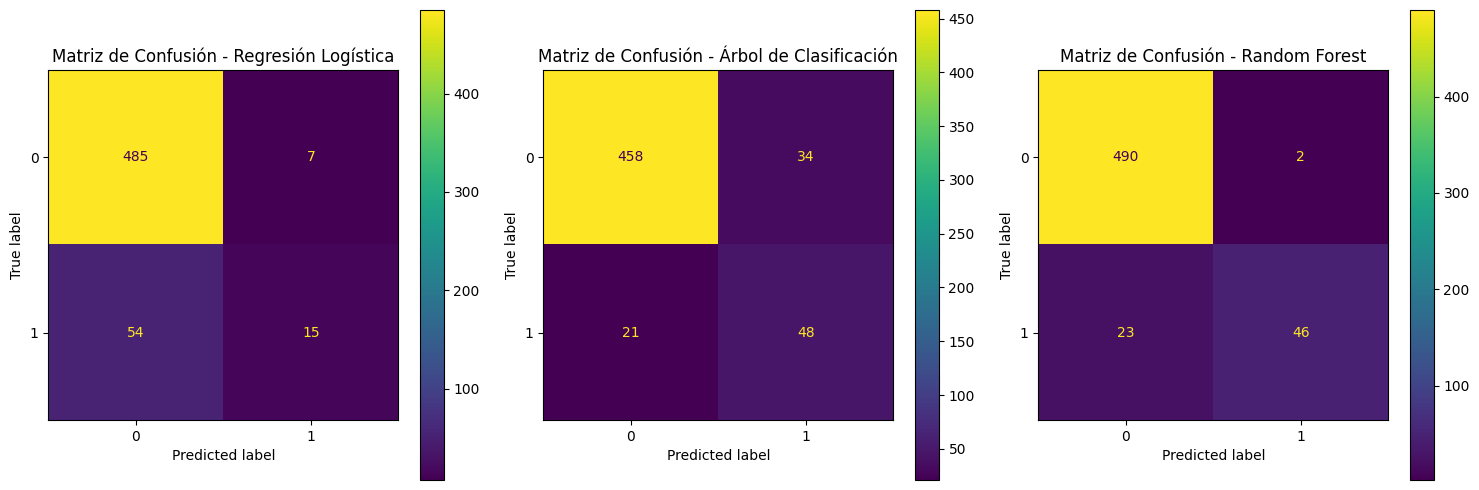

In [ ]:
# Crear subgráficas en paralelo
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Matriz de confusión para el modelo logístico
cm_logistic = confusion_matrix(y_test, y_pred_logistic_model, labels=logistic_model.classes_)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=logistic_model.classes_)
disp_logistic.plot(ax=axs[0])
axs[0].set_title('Matriz de Confusión - Regresión Logística')

# Matriz de confusión para el modelo de árbol
cm_tree = confusion_matrix(y_test, y_pred_tree_Model, labels=tree_model.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree_model.classes_)
disp_tree.plot(ax=axs[1])
axs[1].set_title('Matriz de Confusión - Árbol de Clasificación')

# Matriz de confusión para el modelo de bosque aleatorio
cm_forest = confusion_matrix(y_test, y_pred_forest_model, labels=forest_model.classes_)
disp_forest = ConfusionMatrixDisplay(confusion_matrix=cm_forest, display_labels=forest_model.classes_)
disp_forest.plot(ax=axs[2])
axs[2].set_title('Matriz de Confusión - Random Forest')

# Ajustar el diseño
plt.tight_layout()
plt.show()




# La grafica trabaja de forma inversa ...
# Podemos ver que la  matriz ganadora es  random forest, ya que tiene un total de aciertos de 490 + 46

In [ ]:
# Crear el estratificador de 5 subsets BALANCEADOS
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True) # importante el random_state para que los subset sean siempre los mismos.

In [ ]:
# Realizar validación cruzada con KFold para cada modelo
logistic_cv_scores = cv(logistic_model, X_train, y_train, cv=skf)
tree_cv_scores = cv(tree_model, X_train, y_train, cv=skf)
forest_cv_scores = cv(forest_model, X_train, y_train, cv=skf)

In [ ]:
# Imprimir los resultados de la validación cruzada para cada modelo

print("Resultados de validación Stratified - Regresión Logística:")
print(logistic_cv_scores)
print(f"Precisión media: {logistic_cv_scores.mean()}\n")

print("Resultados de validación Stratified - Árbol de Clasificación:")
print(tree_cv_scores)
print(f"Precisión media: {tree_cv_scores.mean()}\n")

print("Resultados de validación Stratified - Random Forest:")
print(forest_cv_scores)
print(f"Precisión media: {forest_cv_scores.mean()}\n")

Resultados de validación Stratified - Regresión Logística:
[0.89614243 0.90504451 0.90178571 0.90178571 0.88392857]
Precisión media: 0.8977373887240356

Resultados de validación Stratified - Árbol de Clasificación:
[0.89910979 0.92878338 0.89880952 0.91369048 0.92261905]
Precisión media: 0.9126024445386463

Resultados de validación Stratified - Random Forest:
[0.95845697 0.96439169 0.94642857 0.95238095 0.95833333]
Precisión media: 0.9559983043662568



SFS PARTE 2

In [ ]:
# Recurrimos al for para, recorrer del 1 a 13 viariables del dataframe, y de elegir las mejores combinaciones de cada una.
best_feature_sets = [] # Creamos lista vcia.
X_train, X_test, y_train, y_test = train_test_split(X, y)# Split

for num_features in range(1, 14):# Rango de variables.
    # SFS
    sfs = SFS(forest_model, k_features=num_features, forward=False) # de atras para adelante fordward=false
    sfs.fit(X_train, y_train)# Fit
    selected_feature_names = sfs.k_feature_names_# Nombre de las varibles que combinados dan la mejor presicion
    best_feature_sets.append(selected_feature_names) # Rellenamos lista vacia con los nombres
    print(f"Mejores {num_features} características seleccionadas: {selected_feature_names}")

Mejores 1 características seleccionadas: ('International plan',)
Mejores 2 características seleccionadas: ('International plan', 'Total intl minutes')
Mejores 3 características seleccionadas: ('International plan', 'Total day minutes', 'Total intl charge')
Mejores 4 características seleccionadas: ('International plan', 'Total day charge', 'Total eve minutes', 'Total intl minutes')
Mejores 5 características seleccionadas: ('International plan', 'Number vmail messages', 'Total day minutes', 'Total eve charge', 'Total intl charge')
Mejores 6 características seleccionadas: ('International plan', 'Voice mail plan', 'Total day minutes', 'Total eve charge', 'Total intl calls', 'Total intl charge')
Mejores 7 características seleccionadas: ('International plan', 'Voice mail plan', 'Total day charge', 'Total eve minutes', 'Total night charge', 'Total intl calls', 'Total intl charge')
Mejores 8 características seleccionadas: ('International plan', 'Voice mail plan', 'Total day charge', 'Total eve

In [ ]:
# Con la lista de best_feature_sets ya definida anteriormente, avanzamos con el cross usando StratifiedKFold
for feature_set in best_feature_sets:
    # Recorremos las variables de X_train
    X_selected = X_train[list(feature_set)]
    # Aplicamos modelo
    forest_model.fit(X_selected, y_train)

    # prediccion en entrenamiento
    y_pred_train = forest_model.predict(X_selected)

    # Accuracy en entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # recorremos las variables de X_test
    X_test_selected = X_test[list(feature_set)]

    # rredicciones  conjunto de prueba
    y_pred_test = forest_model.predict(X_test_selected)


    # Croos con StratifiedKFold
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)# Aplicamos balance de categorias
    forest_cv_scores = cv(forest_model, X_train, y_train, cv=skf) # Cross validation
    precision_stratified = forest_cv_scores.mean()
    print(f"Características: {feature_set}")
    print(f"Presicion Stratified:{precision_stratified:.6f}")

Características: ('International plan',)
Presicion Stratified:0.953630
Características: ('International plan', 'Total intl minutes')
Presicion Stratified:0.950064
Características: ('International plan', 'Total day minutes', 'Total intl charge')
Presicion Stratified:0.950060
Características: ('International plan', 'Total day charge', 'Total eve minutes', 'Total intl minutes')
Presicion Stratified:0.953034
Características: ('International plan', 'Number vmail messages', 'Total day minutes', 'Total eve charge', 'Total intl charge')
Presicion Stratified:0.952439
Características: ('International plan', 'Voice mail plan', 'Total day minutes', 'Total eve charge', 'Total intl calls', 'Total intl charge')
Presicion Stratified:0.950065
Características: ('International plan', 'Voice mail plan', 'Total day charge', 'Total eve minutes', 'Total night charge', 'Total intl calls', 'Total intl charge')
Presicion Stratified:0.954225
Características: ('International plan', 'Voice mail plan', 'Total day c

Gridsearch-HIPERPARAMETROS

In [ ]:
X= df[['International plan', 'Voice mail plan', 'Total day charge',
       'Total eve minutes', 'Total night charge', 'Total intl calls',
       'Total intl charge']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


In [ ]:
# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=5, scoring='f1')

In [ ]:
# Ajusta los datos a tus modelos
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1')

In [ ]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
# Realizar predicciones en los datos de prueba
y_pred_test = grid_search.predict(X_test)

In [ ]:
# Calcular la precisión en los datos de prueba
precision = accuracy_score(y_test, y_pred_test)

In [ ]:
print(precision)

0.9625668449197861
